# 2 – Analysis of the Installed Dataset (`installed.json`)

## Table of Contents
1. [Introduction](#introduction)
2. [Setup and Data Loading](#setup-and-data-loading)
3. [Initial Exploration](#initial-exploration)
4. [2a. Merging Filtered License Data & Installed Data](#2a-merge-filtered)
5. [2b. Comparing Location Variables](#2b-compare-locations)
6. [2c. Additional Location-Based Filtering](#2c-location-filter)
7. [2d. Identify Another Variable to Filter](#2d-identify-filter)
8. [2e. Cleaning a Variable with Many Categories](#2e-category-cleaning)
9. [Conclusion](#conclusion)


<a id="introduction"></a>
## Introduction

In this second part of the project, we analyze the **Installed** dataset (`installed.json`) and merge it with our filtered License data (i.e., only “ACTIVE” licenses). We will explore location fields, filter data based on various conditions, and clean a high‐cardinality variable (one with more than 5 categories).


<a id="setup-and-data-loading"></a>
## 2. Setup and Data Loading


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plotting style for better visuals
sns.set(style="whitegrid")
%matplotlib inline

# Step 1: Check the current working directory
print("Current working directory:", os.getcwd())

# Step 2: List available files in the directory
print("Files in the current directory:", os.listdir())

# Step 3: Load the cleaned License DataFrame
try:
    license_df = pd.read_csv('data/cleaned_license_data.csv')  # Must exist in your folder
    print(f"License (Filtered) shape: {license_df.shape}")
except FileNotFoundError as e:
    print("Error: The file 'cleaned_license_data.csv' was not found. Please check the file path.")
    raise e

# Step 4: Load the Installed DataFrame
try:
    installed_df = pd.read_json('data/installed.json')  # Must exist in your folder
    print(f"Installed shape: {installed_df.shape}")
except FileNotFoundError as e:
    print("Error: The file 'installed.json' was not found. Please check the file path.")
    raise e




Current working directory: /home/gamikarudev/programming/courses/codeboxx/ai-for-devs/etl_project
Files in the current directory: ['requirements.txt', '.idea', 'cleaned_license_data.csv', 'licence-ETL.ipynb', 'inspections-ETL.ipynb', '.ipynb_checkpoints', '.gitignore', 'data', 'LICENSE', 'installed-ETL.ipynb', 'altered-ETL.ipynb', '.git']
License (Filtered) shape: (45340, 15)
Installed shape: (46936, 9)


<a id="initial-exploration"></a>
## 3. Initial Exploration


In [9]:
# --- Preliminary look at our data ---

# Quick look at License DataFrame
print("Preview of license_df:")
display(license_df.head())

# Check for missing values in license_df
print("\nMissing values in license_df:")
print(license_df.isnull().sum())

# Descriptive stats for license_df
print("\nDescriptive stats for license_df:")
display(license_df.describe(include='all'))

# Quick look at Installed DataFrame
print("\nPreview of installed_df:")
display(installed_df.head())

# Check for missing values in installed_df
print("\nMissing values in installed_df:")
print(installed_df.isnull().sum())

# Descriptive stats for installed_df
print("\nDescriptive stats for installed_df:")
display(installed_df.describe(include='all'))


Preview of license_df:


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,State_Province,Country,ExpiryMonth,Expiry_YearMonth
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,2017-04-28,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted,ON,CA,April,2017-04
1,100,1804 HIGHWAY 2 E BROCKVILLE K6V 5T1 ON CA,170719,BY REQUEST,2014-12-12,INFRASTRUCTURE ONTARIO AND LANDS CORPORATION,data redacted,18 KING ST E TORONTO ON M5C 1C4 CA,CB RICHARD ELLIS GLOBAL CORPORATE SERVICES,333 PRESTON ST 7TH FLR PRESTON SQUARE TOWER 1 ...,data redacted,ON,CA,December,2014-12
2,10047,162 PEMBROKE ST W PEMBROKE K8A 5M8 ON CA,EDLIC-010047,BY REQUEST,2008-03-15,PROFAC MANAGEMENT GROUP LTD,data redacted,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,PROFAC MANAGEMENT GROUP LTD,304 THE EAST MALL P.O. # 653058-Y3-20610 TORON...,data redacted,ON,CA,March,2008-03
3,10054,541 SUSSEX DR OTTAWA K1N 6Z6 ON CA,EDLIC-010054,BY REQUEST,2005-10-01,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,data redacted,4900 YONGE ST 11TH FLOOR TORONTO ON M2N 6A6 CA,DEPARTMENT OF PUBLIC WORKS & GOVERNMENT SERVIC...,"4900 YONGE ST 11TH FLOOR TORONTO, ON, M2N 6A6, CA",data redacted,ON,CA,October,2005-10
4,1009,404 MAIN ST WOODSTOCK N4S 7X5 ON CA,EDLIC-001009,ACTIVE,2017-07-15,AGRIBRANDS PURINA CANADA INC,data redacted,404 MAIN ST PO BOX 250 WOODSTOCK ON N4S 7X5 CA,AGRIBRANDS PURINA CANADA INC,"404 MAIN ST PO BOX 250 WOODSTOCK, ON, N4S 7X5, CA",data redacted,ON,CA,July,2017-07



Missing values in license_df:
ElevatingDevicesNumber           0
LocationoftheElevatingDevice     0
ElevatingDevicesLicenseNumber    0
LICENSESTATUS                    0
LICENSEEXPIRYDATE                0
LICENSEHOLDER                    0
LICENSEHOLDERACCOUNTNUMBER       0
LICENSEHOLDERADDRESS             0
BILLINGCUSTOMER                  0
BILLINGADDRESS                   0
BILLINGACCOUNT                   0
State_Province                   0
Country                          0
ExpiryMonth                      0
Expiry_YearMonth                 0
dtype: int64

Descriptive stats for license_df:


,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,State_Province,Country,ExpiryMonth,Expiry_YearMonth
count,4.534000e+04,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340
unique,NaN,23442,45340,11,1118,16352,1,13269,16300,12574,1,1,1,12,382
top,NaN,3401 DUFFERIN ST TORONTO M6A 2T9 ON CA,EDLIC-000010,ACTIVE,2017-04-15,TORONTO COMMUNITY HOUSING CORPORATION,data redacted,35 CARL HALL RD SUITE 4 TORONTO ON M3K 2B6 CA,TORONTO COMMUNITY HOUSING CORPORATION,"35 CARL HALL RD SUITE 4 TORONTO, ON, M3K 2B6, CA",data redacted,ON,CA,July,2017-07
freq,NaN,57,1,42625,2181,575,45340,576,575,576,45340,45340,45340,4524,4358
mean,9.951169e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.326255e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.313075e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.198850e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.191750e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Preview of installed_df:


,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
0,8,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
1,9,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
2,10,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
3,11,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N
4,13,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N



Missing values in installed_df:
Elevating devices number     0
Owner Name                   0
Owner Address                0
Owner Account Number         0
Device Class                 0
Device Type                  0
DeviceStatus                 0
Location of Device          48
under review                 0
dtype: int64

Descriptive stats for installed_df:


,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
count,4.693600e+04,46936,46936,46936,46936,46936,46936,46888,46936
unique,NaN,16586,13339,1,1,11,5,24028,2
top,NaN,TORONTO COMMUNITY HOUSING CORPORATION,35 CARL HALL RD SUITE 4 TORONTO ON M3K 2B6 CA,redacted,Elevators,Passenger Elevator,Active,TERMINAL 3 COMPLEX TORONTO L5P 1B2 ON CA,N
freq,NaN,576,576,46936,46936,42405,44731,61,46920
mean,9.972200e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.328375e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.291175e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.194850e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.178550e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="2a-merge-filtered"></a>
## 4. 2(a). Merging Filtered License Data & Installed Data

**Requirement**:  
“Merge the filtered rows (from question 1c) from the License dataset with the installed elevators. Determine how many rows are merged from each dataset and the total number of rows in the merged dataset.”

---


In [10]:
# === 2(a) STEP 1: Standardize Column Names ===
# The Installed dataset might call the ID column "Elevating devices number".
# We'll rename it to match the license DataFrame's "ElevatingDevicesNumber".

installed_df.rename(columns={'Elevating devices number': 'ElevatingDevicesNumber'}, inplace=True)

print("After renaming columns in installed_df:")
print(installed_df.columns.tolist())


After renaming columns in installed_df:
['ElevatingDevicesNumber', 'Owner Name', 'Owner Address', 'Owner Account Number', 'Device Class', 'Device Type', 'DeviceStatus', 'Location of Device', 'under review']


In [11]:
# === 2(a) STEP 2: Verify that 'ElevatingDevicesNumber' is in both DataFrames ===
print("License DataFrame columns:", license_df.columns.tolist())
print("Installed DataFrame columns:", installed_df.columns.tolist())

common_key = 'ElevatingDevicesNumber'
if common_key not in license_df.columns or common_key not in installed_df.columns:
    raise ValueError(f"ERROR: '{common_key}' is missing from one of the DataFrames.")
else:
    print(f"SUCCESS: '{common_key}' found in both DataFrames.")


License DataFrame columns: ['ElevatingDevicesNumber', 'LocationoftheElevatingDevice', 'ElevatingDevicesLicenseNumber', 'LICENSESTATUS', 'LICENSEEXPIRYDATE', 'LICENSEHOLDER', 'LICENSEHOLDERACCOUNTNUMBER', 'LICENSEHOLDERADDRESS', 'BILLINGCUSTOMER', 'BILLINGADDRESS', 'BILLINGACCOUNT', 'State_Province', 'Country', 'ExpiryMonth', 'Expiry_YearMonth']
Installed DataFrame columns: ['ElevatingDevicesNumber', 'Owner Name', 'Owner Address', 'Owner Account Number', 'Device Class', 'Device Type', 'DeviceStatus', 'Location of Device', 'under review']
SUCCESS: 'ElevatingDevicesNumber' found in both DataFrames.


In [12]:
# === 2(a) STEP 3: Merge the DataFrames on the Common Identifier ===
# We'll do an INNER JOIN so that only matching elevator IDs appear in the merged result.

merged_df = pd.merge(license_df, installed_df, on=common_key, how='inner')

print("Number of rows in license_df (filtered):", len(license_df))
print("Number of rows in installed_df:", len(installed_df))
print("Number of rows in merged_df (inner join):", len(merged_df))


Number of rows in license_df (filtered): 45340
Number of rows in installed_df: 46936
Number of rows in merged_df (inner join): 45340


In [13]:
# === 2(a) STEP 4: Calculate Fractions Merged (Optional) ===
fraction_license = (len(merged_df) / len(license_df)) * 100
fraction_installed = (len(merged_df) / len(installed_df)) * 100

print(f"{fraction_license:.2f}% of the license_df rows merged successfully.")
print(f"{fraction_installed:.2f}% of the installed_df rows merged successfully.")


100.00% of the license_df rows merged successfully.
96.60% of the installed_df rows merged successfully.


**Discussion & Justification**:
- We have successfully merged the two DataFrames by `ElevatingDevicesNumber`. 
- The inner join ensures we only keep rows where that key appears in *both* datasets.
- Above, we can see how many rows are retained from each side.


<a id="2b-compare-locations"></a>
## 5. 2(b). Comparing Location Variables

**Requirement**:  
“Compare the location variables in both datasets. Identify observations where the variables are not equal. What do you notice?”

**Objective**:  
- We’ll check `merged_df['LocationoftheElevatingDevice']` vs `merged_df['Location of Device']`.
- Count mismatches, classify them (partial vs complete mismatch), and inspect examples.

---


In [14]:
# === 2(b) STEP 1: Identify Mismatched Rows ===
license_loc_col = 'LocationoftheElevatingDevice'
installed_loc_col = 'Location of Device'

location_mismatch_mask = (merged_df[license_loc_col] != merged_df[installed_loc_col])
num_mismatched = location_mismatch_mask.sum()

print(f"Total number of mismatched location rows: {num_mismatched}")


Total number of mismatched location rows: 119


In [15]:
# === 2(b) STEP 2: If mismatches exist, create a mismatch DataFrame ===
if num_mismatched > 0:
    mismatch_df = merged_df.loc[location_mismatch_mask, [
        common_key, license_loc_col, installed_loc_col
    ]].copy()

    display(mismatch_df.head(10))  # Show the first 10 mismatches
else:
    print("No mismatched location rows found.")


,ElevatingDevicesNumber,LocationoftheElevatingDevice,Location of Device
578,11874,4 LATIMER AV TORONTO M5N 2L9 ON CA,4 LATIMER AVE TORONTO M5N 2L9 ON CA
1276,13052,67 PARKWOODS VILLAGE DR DON MILLS M3A 2X4 ON CA,67 PARKWOODS VILLAGE DR NORTH YORK M3A 2X4 ON CA
1277,13053,67 PARKWOODS VILLAGE DR DON MILLS M3A 2X4 ON CA,67 PARKWOODS VILLAGE DR NORTH YORK M3A 2X4 ON CA
1420,13249,70 PARKWOODS VILLAGE DR DON MILLS M3A 2X7 ON CA,70 PARKWOODS VILLAGE DR NORTH YORK M3A 2X7 ON CA
3663,16417,31 ST DENNIS DR DON MILLS M3C 1G7 ON CA,31 ST DENNIS DR NORTH YORK M3C 1G7 ON CA
3664,16418,31 ST DENNIS DR DON MILLS M3C 1G7 ON CA,31 ST DENNIS DR NORTH YORK M3C 1G7 ON CA
3742,16524,35 ST DENNIS DR DON MILLS M3C 1G9 ON CA,35 ST DENNIS DR NORTH YORK M3C 1G9 ON CA
3743,16525,35 ST DENNIS DR DON MILLS M3C 1G9 ON CA,35 ST DENNIS DR NORTH YORK M3C 1G9 ON CA
5860,19288,170 DUDLEY AVE THORNHILL L3T 2E6 ON CA,170 DUDLEY AVE THORNHILL L3T 2E7 ON CA
5861,19289,170 DUDLEY AVE THORNHILL L3T 2E6 ON CA,170 DUDLEY AVE THORNHILL L3T 2E7 ON CA


In [16]:
# === 2(b) STEP 3: Classify Mismatches (Optional) ===
def classify_discrepancy(row):
    loc1 = row[license_loc_col]
    loc2 = row[installed_loc_col]

    if pd.isnull(loc1) or pd.isnull(loc2):
        return "Missing Value"
    elif loc1[:10] == loc2[:10]:
        return "Partial Mismatch"
    else:
        return "Complete Mismatch"

if num_mismatched > 0:
    mismatch_df['Discrepancy_Type'] = mismatch_df.apply(classify_discrepancy, axis=1)
    discrepancy_counts = mismatch_df['Discrepancy_Type'].value_counts()
    print("\nDiscrepancy Type Counts:")
    print(discrepancy_counts)



Discrepancy Type Counts:
Discrepancy_Type
Partial Mismatch     84
Complete Mismatch    30
Missing Value         5
Name: count, dtype: int64


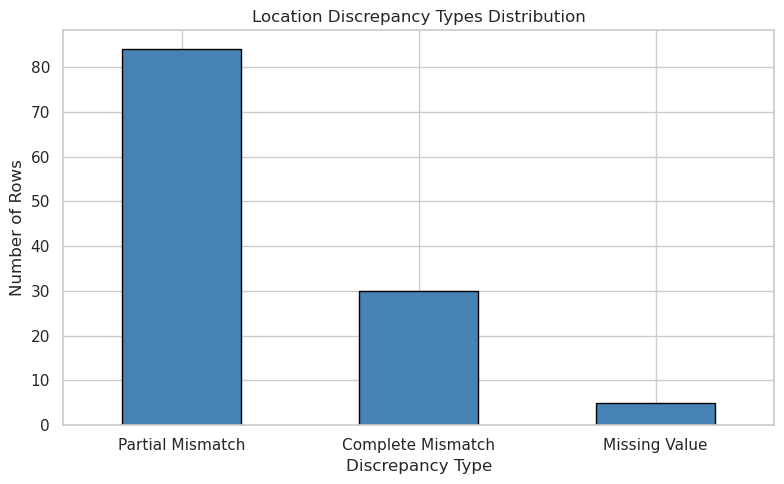

In [17]:
# === 2(b) STEP 4: Visualize the Mismatch Types ===
if num_mismatched > 0:
    plt.figure(figsize=(8,5))
    discrepancy_counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title("Location Discrepancy Types Distribution")
    plt.xlabel("Discrepancy Type")
    plt.ylabel("Number of Rows")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



**Discussion**:
- We can see exactly how many rows differ between `LocationoftheElevatingDevice` and `Location of Device`.
- “Partial Mismatch” often indicates a small difference (like “AV” vs “AVE”).
- “Complete Mismatch” might mean an entirely different address. 


<a id="2c-location-filter"></a>
## 6. 2(c). Additional Location-Based Filtering

**Requirement**:  
“What information from the location data can you extract to compare the two columns? Is there a variable we could use to filter the dataset? Apply the filter and overwrite the DataFrame.”

**Objective**:  
- Extract relevant parts (city/postal code) from each location string.  
- Compare or filter based on those fields (e.g., keep only matching postal codes).  
- Overwrite `merged_df`.

---


In [18]:
# === 2(c) STEP 1: EXAMPLE - Extract City & Postal Code from strings ===
# (This is just an example. Adjust to your actual location format.)

def extract_city_and_postal(location_str):
    if not isinstance(location_str, str):
        return pd.Series([None, None])
    
    # Find something like "M7A 1A2" in uppercase
    postal_match = re.search(r'[A-Z]\d[A-Z]\s?\d[A-Z]\d', location_str.upper())
    postal_code = postal_match.group(0) if postal_match else None

    # For city, let's guess it's the second token (this is naive!)
    tokens = location_str.split()
    city = tokens[1] if len(tokens) > 1 else None
    
    return pd.Series([city, postal_code])

# We'll create new columns in merged_df for the license and installed location
merged_df[['City_from_License','PostalCode_from_License']] = merged_df[license_loc_col].apply(extract_city_and_postal)
merged_df[['City_from_Installed','PostalCode_from_Installed']] = merged_df[installed_loc_col].apply(extract_city_and_postal)

print("Sample of extracted city/postal columns:")
display(merged_df[['City_from_License','PostalCode_from_License',
                   'City_from_Installed','PostalCode_from_Installed']].head())


Sample of extracted city/postal columns:


,City_from_License,PostalCode_from_License,City_from_Installed,PostalCode_from_Installed
0,WELLESLEY,M7A 1A2,WELLESLEY,M7A 1A2
1,HIGHWAY,K6V 5T1,HIGHWAY,K6V 5T1
2,PEMBROKE,K8A 5M8,PEMBROKE,K8A 5M8
3,SUSSEX,K1N 6Z6,SUSSEX,K1N 6Z6
4,MAIN,N4S 7X5,MAIN,N4S 7X5


In [19]:
# === 2(c) STEP 2: Filter the DataFrame by a location criterion (e.g., matching postal codes) ===
rows_before = len(merged_df)
postal_match_mask = (merged_df['PostalCode_from_License'] == merged_df['PostalCode_from_Installed'])
merged_df = merged_df[postal_match_mask].copy()  # Overwrite

print(f"Rows before postal code filter: {rows_before}")
print(f"Rows after filter: {len(merged_df)}")
print("We now only keep rows where the postal codes match.")


Rows before postal code filter: 45340
Rows after filter: 45231
We now only keep rows where the postal codes match.


In [20]:
# If you want to see how many were filtered out
filtered_out = rows_before - len(merged_df)
print(f"{filtered_out} rows were removed due to non-matching postal codes.")


109 rows were removed due to non-matching postal codes.


**Discussion**:
- We now only keep rows where the postal codes from both columns are the same. 
- This step overwrote our `merged_df`, so subsequent analysis only sees these matched rows.


In [23]:
# Scatter Plot of Mismatched Postal Codes

plt.figure(figsize=(15, 8))
sns.scatterplot(
    x='PostalCode_from_License',
    y='PostalCode_from_Installed',
    hue='City_from_License',
    data=postal_code_mismatches,
    palette='tab20',
    s=100, edgecolor="black", alpha=0.7
)
plt.title('Scatter Plot of Mismatched Postal Codes', fontsize=16)
plt.xlabel('Postal Code from License', fontsize=12)
plt.ylabel('Postal Code from Installed', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="City from License", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


NameError: name 'postal_code_mismatches' is not defined

In [ ]:
# Enhanced Bar Chart for City Distribution

city_distribution_filtered = city_distribution[city_distribution > 60].copy()
city_distribution_filtered.loc['Others'] = city_distribution[city_distribution <= 60].sum()

plt.figure(figsize=(25, 8))
city_distribution_filtered.sort_values(ascending=False).plot(kind='bar',
    color='lightcoral', edgecolor='black')
plt.title('Distribution of Elevators by City (Filtered and Grouped)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Bar Chart of Top 10 Mismatched Postal Codes

top_mismatch_summary = postal_code_mismatches['PostalCode_from_License'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_mismatch_summary.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Top 10 Mismatched Postal Codes (License)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Postal Code', fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


<a id="2d-identify-filter"></a>
## 7. 2(d). Identify Another Variable to Filter

**Requirement**:  
“Identify a variable to filter the dataset, apply the filter, and overwrite the DataFrame.”

**Objective**:  
Pick a column (e.g., `DeviceStatus`), choose which values to keep (e.g., `'Active'`), and overwrite `merged_df`.

---


In [ ]:
# === 2(d) STEP 1: Inspect possible values in 'DeviceStatus' ===
print("Unique values in 'DeviceStatus':")
print(merged_df['DeviceStatus'].unique())

# We'll keep only 'Active'
before_count = len(merged_df)
filter_mask = (merged_df['DeviceStatus'] == 'Active')
merged_df = merged_df[filter_mask].copy()
after_count = len(merged_df)

print(f"\nRows before filter: {before_count}")
print(f"Rows after filter (only Active): {after_count}")
print(f"Number of rows removed: {before_count - after_count}")


**Justification**:
We focus on active devices since we only want currently operational elevators. Other statuses like 'Customer Shutdown' or 'Inactive' might not be relevant for certain analytics or reporting.



<a id="2e-category-cleaning"></a>
## 8. 2(e). Cleaning a Variable with Many Categories

**Requirement**:  
“Identify a variable with more than 5 categories that need cleaning. The objective is to reduce the number of categories.”

**Approach**:
1. Look at an existing column (like `'Device Type'`).
2. Map sub‐categories (e.g., `'Freight Elevator-P'`, `'Freight Elevator-E'`) into a single `'Freight Elevator'`.
3. Overwrite or create `DeviceType_Cleaned`.

---


In [ ]:
# === 2(e) STEP 1: Inspect the 'Device Type' categories ===
type_counts = merged_df['Device Type'].value_counts(dropna=False)
print("Device Type categories before cleaning:")
print(type_counts)


In [ ]:
# === 2(e) STEP 2: Define a function to unify similar categories ===
def simplify_device_type(orig_type):
    t = str(orig_type).lower()
    if 'passenger' in t:
        return 'Passenger Elevator'
    elif 'freight' in t:
        return 'Freight Elevator'
    elif 'escalator' in t:
        return 'Escalator'
    elif 'dumbwaiter' in t:
        return 'Dumbwaiter'
    else:
        return 'Other Device'

# Apply the function
merged_df['DeviceType_Cleaned'] = merged_df['Device Type'].apply(simplify_device_type)
new_type_counts = merged_df['DeviceType_Cleaned'].value_counts()

print("\nDeviceType_Cleaned categories after cleaning:")
print(new_type_counts)


In [ ]:
# === 2(e) STEP 3: Visualize the Cleaned Categories (Optional) ===
plt.figure(figsize=(8,5))
new_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Cleaned Device Types")
plt.xlabel("Device Type (Cleaned)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Discussion**:
- We’ve reduced many subcategories (e.g., `'Freight Elevator-P'`, `'Freight Elevator-E'`) into a single `'Freight Elevator'`.
- This helps simplify further analysis or modeling tasks by avoiding high‐cardinality categorical variables.


<a id="conclusion"></a>
## Conclusion

In this second part of our ETL project, we:

- **2(a)** Merged the filtered License dataset with the Installed dataset via `ElevatingDevicesNumber`.
- **2(b)** Compared location fields, counted mismatches, and gained insights into partial vs. complete address discrepancies.
- **2(c)** Extracted city/postal code, filtered rows based on matching postal codes, and overwrote the DataFrame.
- **2(d)** Applied an additional filter (only “Active” devices).
- **2(e)** Cleaned a high‐cardinality variable (`Device Type`) by consolidating similar subcategories.

**Next Steps**:  
- We can merge or compare these results with the “Altered” and “Inspection” datasets.  
- Continue advanced data exploration, building features, and preparing for potential machine‐learning tasks.


Export the merged dataframe for use in part 3:

In [22]:
merged_df.to_csv('merged_installed_data.csv', index=False)
